# NumPy Loop-free programming with arrays
- np.meshgrid
- Expressing Conditional Logic as Array Operations
    - np.where
- Mathematical and Statistical Methods
    - np.mean()
    - data.mean(axis=1)
    - data.sum(0)
    - data.cumsum()
    - data.cumprod()
- Methods for Boolean Arrays
    - bools.any
    - bools.all
- Sorting
    - data.sort
    - data.sort(1)
- Unique and Other Set Logic
    - np.unique

As a simple example, suppose we wished to evaluate the function $\sqrt{(x^2 + y^2)}$ across a regular grid of values. The `np.meshgrid` function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ..., 
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [4]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [5]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

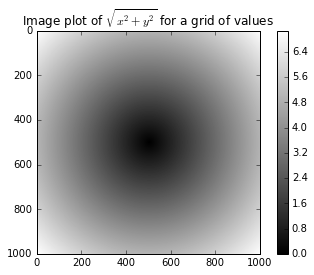

In [8]:
plt.imshow(z, cmap=plt.cm.gray)
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.colorbar()

## Expressing Conditional Logic as Array Operations
The `numpy.where` function is a vectorized version of the ternary expression x if condition else y.

In [9]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [10]:
arr = np.random.randn(4, 4)
arr

array([[ 1.32271135,  0.97439072,  1.27602349,  0.58147124],
       [ 0.37579152,  0.13965219,  1.13223089, -1.58820691],
       [ 0.07499113, -0.66534755, -0.04321016, -1.44497912],
       [-1.35346913, -0.06635182, -0.22593753,  1.23477082]])

In [11]:
np.where(arr > 0, 2, -2)

array([[ 2,  2,  2,  2],
       [ 2,  2,  2, -2],
       [ 2, -2, -2, -2],
       [-2, -2, -2,  2]])

In [12]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[ 2.        ,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        ,  2.        , -1.58820691],
       [ 2.        , -0.66534755, -0.04321016, -1.44497912],
       [-1.35346913, -0.06635182, -0.22593753,  2.        ]])

```py
np.where(cond1 & cond2, 0,
         np.where(cond1, 1,
                  np.where(cond2, 2, 3)))
```

## Mathematical and Statistical Methods

In [14]:
arr = np.random.randn(5, 4) # normally-distributed random data
arr

array([[ 0.93447133,  0.0459762 ,  0.55071234, -2.46296638],
       [ 0.27003122, -0.38931551,  0.56596809, -1.71550877],
       [ 0.63276641, -1.05666919,  0.02152094, -0.40078539],
       [ 0.97474505, -0.49280734, -2.1857206 ,  0.76073666],
       [-0.64350443, -1.25797334,  0.87054467,  1.2927275 ]])

In [15]:
arr.mean()

-0.18425252756603877

In [16]:
np.mean(arr)

-0.18425252756603877

In [17]:
arr.sum()

-3.6850505513207752

In [18]:
arr.mean(axis=1)

array([-0.23295163, -0.31720624, -0.20079181, -0.23576156,  0.0654486 ])

In [19]:
arr.sum(0)

array([ 2.16850957, -3.15078918, -0.17697455, -2.52579639])

In [20]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like cumsum return an array of the same size, but with the partial aggregates computed along the indicated axis according to each lower-dimensional slice:

In [21]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [22]:
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

Table 4-5. Basic array statistical methods

Method | Description
-------|------------
sum | Sum of all the elements in the array or along an axis. Zero-length arrays have sum 0.
mean | Arithmetic mean. Zero-length arrays have NaN mean.
std, var | Standard deviation and variance, respectively, with optional degrees of freedom adjustment (default denominator n).
min, max | Minimum and maximum.
argmin, argmax | Indices of minimum and maximum elements, respectively.
cumsum | Cumulative sum of elements starting from 0
cumprod | Cumulative product of elements starting from 1

## Methods for Boolean Arrays
Boolean values are coerced to 1 (True) and 0 (False) in the above methods.

In [23]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

45

There are two additional methods, any and all, useful especially for boolean arrays. any tests whether one or more values in an array is True, while all checks if every value is True:

In [24]:
bools = np.array([False, False, True, False])
bools.any()

True

In [25]:
bools.all()

False

## Sorting
NumPy arrays can be sorted in-place using the `sort` method:

In [26]:
arr = np.random.randn(6)
arr

array([ 0.21174163,  0.96563987,  0.89731146, -1.99219539,  0.77968303,
        0.19022017])

In [28]:
arr.sort()
arr

array([-1.99219539,  0.19022017,  0.21174163,  0.77968303,  0.89731146,
        0.96563987])

In [29]:
arr = np.random.randn(5, 3)
arr

array([[-1.87874558,  1.18292124,  0.05807595],
       [-0.83261663,  0.79279666, -0.34788237],
       [-0.67793166, -2.24072102,  0.02554566],
       [ 0.74564372, -1.42975955,  0.20761851],
       [-0.17483776,  0.07363921, -0.97996982]])

In [30]:
arr.sort(1)
arr

array([[-1.87874558,  0.05807595,  1.18292124],
       [-0.83261663, -0.34788237,  0.79279666],
       [-2.24072102, -0.67793166,  0.02554566],
       [-1.42975955,  0.20761851,  0.74564372],
       [-0.97996982, -0.17483776,  0.07363921]])

A quick-and-dirty way to compute the quantiles of an array is to sort it and select the value at a particular rank:

In [32]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6172418576473384

## Unique and Other Set Logic
A commonly used one is `np.unique`, which returns the sorted unique values in an array:

In [33]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='|S4')

In [34]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

Another function, `np.in1d`, tests membership of the values in one array in another, returning a boolean array:

In [35]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

Table 4-6. Array set operations

Method | Description
-------|------------
unique(x) | Compute the sorted, unique elements in x
intersect1d(x, y) | Compute the sorted, common elements in x and y
union1d(x, y) | Compute the sorted union of elements
in1d(x, y) | Compute a boolean array indicating whether each element of x is contained in y
setdiff1d(x, y) | Set difference, elements in x that are not in y
setxor1d(x, y) | Set symmetric differences; elements that are in either of the arrays, but not both